In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR

import sys
sys.path.append('/aifs4su/xinshengwang/code/SparkAudio/SparkVox')
from sparkvox.utils.scheduler import WarmupLR, WarmupAnnealSteps, WarmupCosineLRSchedule

In [2]:
# Function to visualize learning rate schedules
def plot_lr_schedules(scheduler, name):
    steps = np.arange(0, 100000, 10)
    # Initialize empty lists to store learning rates at each step
    warmup_lr = []

    # Loop over each step and update the learning rate using the scheduler
    for step in steps:
        # Update scheduler for each step
        scheduler.step(step)
        # Append the current learning rate to the lists
        warmup_lr.append(scheduler.get_lr()[0])
        
    # Plot the learning rates
    plt.figure(figsize=(5, 3))
    plt.plot(steps, warmup_lr, color='b')
    plt.xlabel("Training Step")
    plt.ylabel("Learning Rate")
    plt.title(name)
    plt.grid(True)
    plt.show()

In [3]:
 # Define the optimizer (dummy)
optimizer = AdamW([torch.zeros(1)])

WarmupAnnealSteps

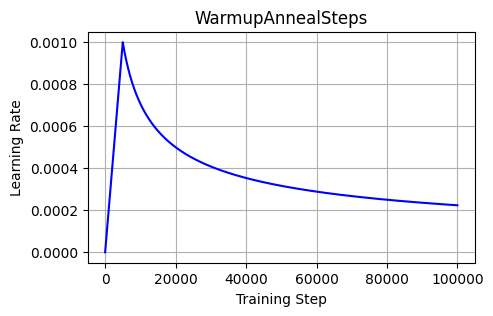

In [5]:
anneal_lr_scheduler = WarmupAnnealSteps(optimizer, warmup_step=5000, anneal_steps=[400000], anneal_rate=0.5)
plot_lr_schedules(anneal_lr_scheduler, 'WarmupAnnealSteps')

In [71]:


class ExponentialLRScheduler(LambdaLR):
    """Exponential LR scheduler with a minimum learning rate cap."""

    def __init__(
        self,
        optimizer: torch.optim.Optimizer,
        gamma: float,
        min_lr: float = 1e-6,
        last_epoch: int = -1,
        verbose: bool = False,
    ):
        self.gamma = gamma
        self.min_lr = min_lr
        # Capture initial learning rates
        self.init_lr = optimizer.param_groups[0]['lr']

        super(ExponentialLRScheduler, self).__init__(
            optimizer, self.lr_lambda, last_epoch=last_epoch, verbose=verbose
        )

    def lr_lambda(self, step: int):
        return max(self.init_lr * self.gamma**step, self.min_lr) / self.init_lr



/home/xinshengwang/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


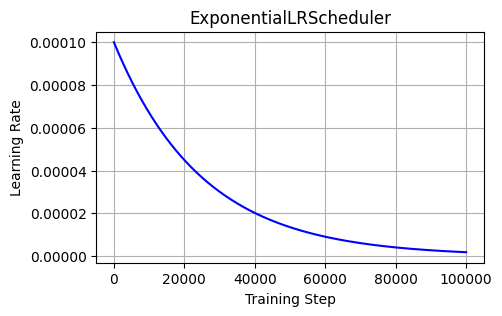

In [76]:
optimizer = AdamW([torch.zeros(1)], lr=0.0001, betas=[0.8, 0.9])
exponential_lr_scheduler = ExponentialLRScheduler(optimizer, gamma = 0.99996, min_lr = 1e-6)
plot_lr_schedules(exponential_lr_scheduler, 'ExponentialLRScheduler')

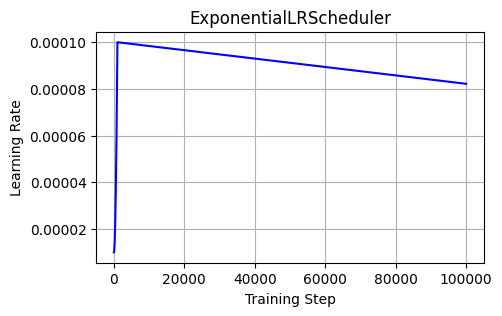

In [75]:
optimizer = AdamW([torch.zeros(1)], lr=1, betas=[0.8, 0.9])
exponential_lr_scheduler = WarmupLR(optimizer, 
warmup_step=1000, down_step=500000, min_lr=1.0e-5, max_lr=1.0e-4 )
plot_lr_schedules(exponential_lr_scheduler, 'ExponentialLRScheduler')